In [1]:
import pandas as pd

In [2]:
training_dataset = pd.read_csv("./digit-recognizer/train.csv")

In [3]:
training_dataset.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Now extracting features and labels from dataset
features = training_dataset.drop(columns=["label"])

labels = training_dataset["label"]

print("Features Shape:", features.shape)
print("Labels Shape:", labels.shape)

Features Shape: (42000, 784)
Labels Shape: (42000,)


In [5]:
features = features / 255.0  # For Normalization and scaling it between 0 and 1

In [6]:
features = features.to_numpy()

In [7]:
features = features.reshape(-1, 28, 28, 1)  # Reshape for cnn model

In [8]:
from keras.utils import to_categorical

labels = to_categorical(labels,
                        num_classes=10)  # Making labels from 1 to 10 which will be interpreted as index 0 to 9 basically one hot encoding is done

print("Labels Shape After One-hot encoding:", labels.shape)


Labels Shape After One-hot encoding: (42000, 10)


In [9]:
from sklearn.model_selection import train_test_split

X_train, x_val, Y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

print("X_train Shape:", X_train.shape)
print("x_val Shape:", x_val.shape)
print("Y_train Shape:", Y_train.shape)
print("y_val Shape:", y_val.shape)

X_train Shape: (33600, 28, 28, 1)
x_val Shape: (8400, 28, 28, 1)
Y_train Shape: (33600, 10)
y_val Shape: (8400, 10)


In [10]:
# Defining CNN model
from keras import Sequential, optimizers, layers

model = Sequential([
	layers.Input((28, 28, 1)),
	layers.Conv2D(32, (3, 3), activation='relu'),
	layers.MaxPooling2D(pool_size=(2, 2)),

	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(pool_size=(2, 2)),

	layers.Conv2D(128, (3, 3), activation='relu'),
	layers.MaxPooling2D(pool_size=(2, 2)),

	layers.Flatten(),

	layers.Dense(128, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', metrics=["accuracy"], loss="categorical_crossentropy")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, Y_train, batch_size=18, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8344 - loss: 0.4910 - val_accuracy: 0.9602 - val_loss: 0.1211
Epoch 2/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9743 - loss: 0.0833 - val_accuracy: 0.9793 - val_loss: 0.0663
Epoch 3/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9799 - val_loss: 0.0634
Epoch 4/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9792 - val_loss: 0.0608
Epoch 5/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9892 - loss: 0.0313 - val_accuracy: 0.9812 - val_loss: 0.0604
Epoch 6/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9915 - loss: 0.0245 - val_accuracy: 0.9823 - val_loss: 0.0572
Epoch 7/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9833 - val_loss: 0.0582
Epoch 8/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9937 -

In [12]:
all_stats = history.history
print(all_stats)

{'accuracy': [0.9261606931686401, 0.9760119318962097, 0.982202410697937, 0.9860416650772095, 0.9885119199752808, 0.9909821152687073, 0.993184506893158, 0.9934226274490356, 0.9940178394317627, 0.9957737922668457], 'loss': [0.2297048419713974, 0.07946960628032684, 0.05537940189242363, 0.042456209659576416, 0.0346258170902729, 0.026806415989995003, 0.021019576117396355, 0.020273203030228615, 0.01737091690301895, 0.012196622788906097], 'val_accuracy': [0.9602380990982056, 0.979285717010498, 0.9798809289932251, 0.9791666865348816, 0.9811905026435852, 0.9822618961334229, 0.9833333492279053, 0.9839285612106323, 0.9864285588264465, 0.9836905002593994], 'val_loss': [0.12106578052043915, 0.06630507856607437, 0.06341809034347534, 0.060811422765254974, 0.06035257503390312, 0.05721244588494301, 0.05815737694501877, 0.060364607721567154, 0.04731370136141777, 0.07341472804546356]}


In [13]:
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9821 - loss: 0.0886
Test Accuracy: 0.9836905002593994
Test Loss: 0.07341469824314117


In [14]:
import numpy as np

image = x_val[0].reshape(1, 28, 28, 1)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)
print("Predicted digit:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Predicted digit: 8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


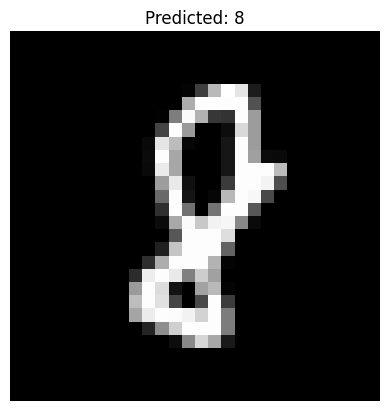

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


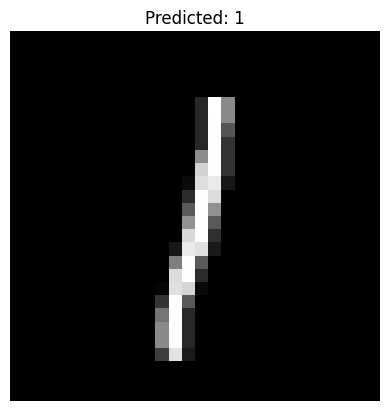

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


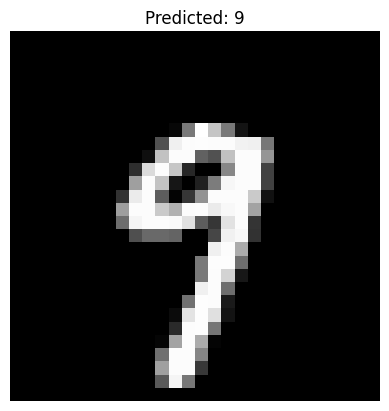

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


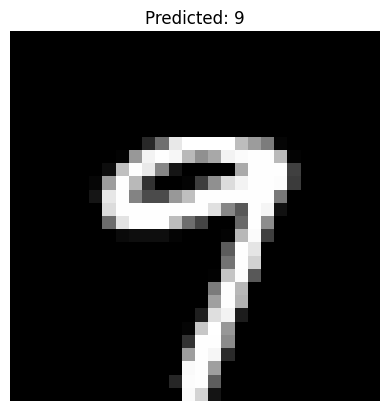

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


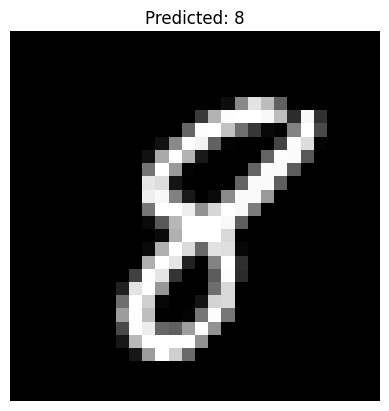

In [15]:
import matplotlib.pyplot as plt

for i in range(5):
	plt.imshow(x_val[i].reshape(28, 28), cmap="gray")
	pred = model.predict(x_val[i].reshape(1, 28, 28, 1))
	plt.title(f"Predicted: {np.argmax(pred)}")
	plt.axis('off')
	plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


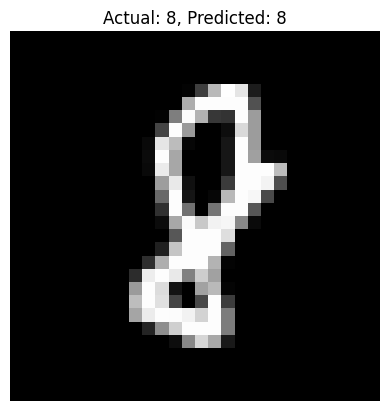

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


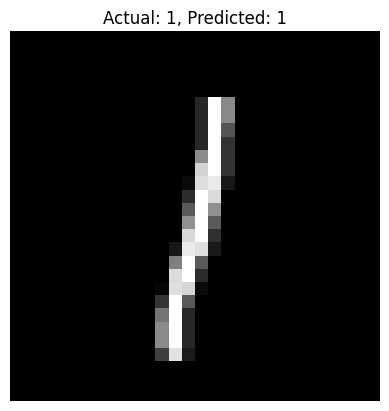

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


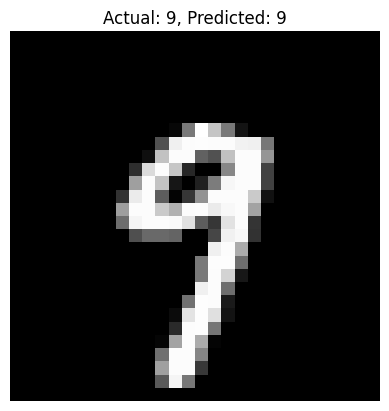

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


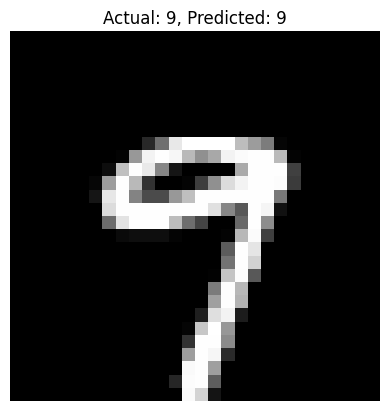

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


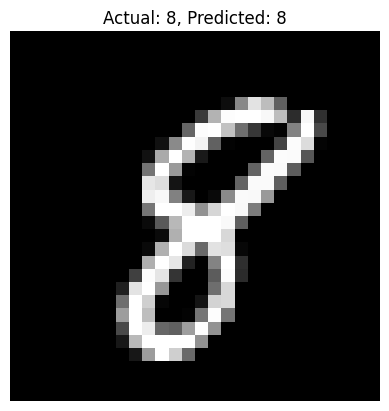

In [16]:
for i in range(5):
	plt.imshow(x_val[i].reshape(28, 28), cmap='gray')

	pred = model.predict(x_val[i].reshape(1, 28, 28, 1))
	predicted_class = np.argmax(pred)

	actual_class = np.argmax(y_val[i])

	plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
	plt.axis('off')
	plt.show()

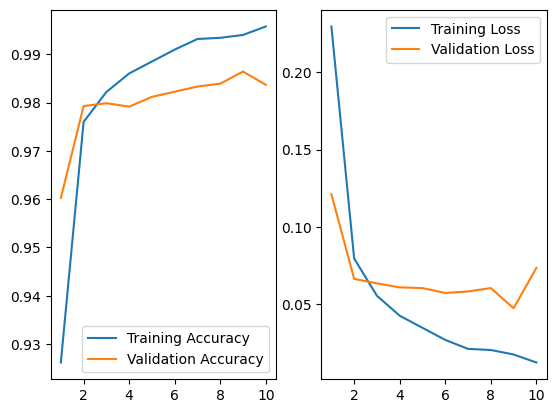

In [17]:
train_accuracy = all_stats["accuracy"]
validation_accuracy = all_stats["val_accuracy"]

train_loss = all_stats["loss"]
validation_loss = all_stats["val_loss"]

epochs = range(1, len(train_loss) + 1)

plt.subplot(1, 2, 1)

plt.plot(epochs, train_accuracy, label="Training Accuracy")
plt.plot(epochs, validation_accuracy, label="Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.legend()

plt.show()